<a href="https://colab.research.google.com/github/harshita547/Python/blob/main/HousePricePredictionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Loading data
data = pd.read_csv("/content/House Price India.csv")


In [5]:

# Feature and target selection
X = data[['id', 'number of bedrooms', 'number of bathrooms', 'living area',
          'lot area', 'number of floors', 'waterfront present', 'number of views',
          'condition of the house', 'grade of the house',
          'Area of the house(excluding basement)', 'Area of the basement',
          'Built Year', 'Renovation Year', 'Lattitude', 'Longitude',
          'Number of schools nearby', 'Distance from the airport']]
y = data['Price']


In [6]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=101)

# Model training
lm = LinearRegression()
lm.fit(X_train, y_train)

# Coefficients for train test split
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
print(coeff_df)

# Predictions for test set
predictions = lm.predict(X_test)


                                         Coefficient
id                                        -24.869391
number of bedrooms                     -21523.878579
number of bathrooms                     21316.561246
living area                                68.492806
lot area                                   -0.293199
number of floors                       -18526.834414
waterfront present                     576368.505364
number of views                         29822.256868
condition of the house                  10420.886659
grade of the house                      59409.440833
Area of the house(excluding basement)      46.310807
Area of the basement                       22.181999
Built Year                              -1465.994486
Renovation Year                            17.772143
Lattitude                               95154.777690
Longitude                             -111763.497747
Number of schools nearby                 2599.160733
Distance from the airport                 127.

Mean Absolute Error: 99970.85220393796
Mean Squared Error: 47256809283.226814
Root Mean Squared Error: 217386.3134680443
R² Score: 0.7011941419627996


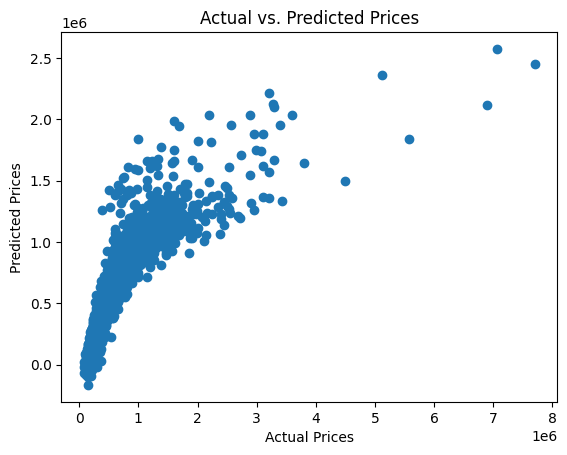

In [7]:

# Evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

# Scatter plot of actual vs. predicted
plt.scatter(y_test, predictions)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()



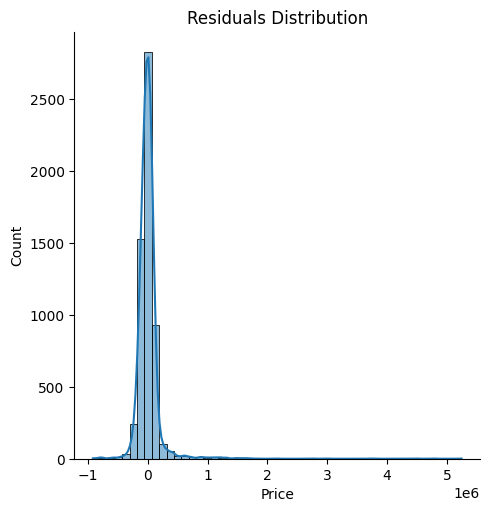

In [9]:
# Residual plot
sns.displot((y_test - predictions), bins=50, kde=True)
plt.title("Residuals Distribution")
plt.show()





In [11]:
# Input section for prediction
print("\nEnter the values for the following parameters to predict house price:")

params = {'id': float(input("ID (Enter your ID): ")),
    'number of bedrooms': float(input("Number of Bedrooms: ")),
    'number of bathrooms': float(input("Number of Bathrooms: ")),
    'living area': float(input("Living Area (sq ft): ")),
    'lot area': float(input("Plot Area (sq ft): ")),
    'number of floors': float(input("Number of Floors: ")),
    'waterfront present': float(input("Is your house present near ocean,lake (1 for Yes, 0 for No): ")),
    'number of views': float(input("Number of Views: ")),
    'condition of the house': float(input("Condition of the House (1-5): ")),
    'grade of the house': float(input("Overall Quality of the House (1-13): ")),
    'Area of the house(excluding basement)': float(input("Area of the House (excluding basement): ")),
    'Area of the basement': float(input("Area of the Basement: ")),
    'Built Year': float(input("Built Year: ")),
    'Renovation Year': float(input("Renovation Year (0 if no renovation): ")),
    'Lattitude': float(input("Lattitude: ")),
    'Longitude': float(input("Longitude: ")),
    'Number of schools nearby': float(input("Number of Schools Nearby: ")),
    'Distance from the airport': float(input("Distance from the Airport (in km): "))
}

# Convert user input to DataFrame
input_data = pd.DataFrame([params])
# Make a prediction
predicted_price = lm.predict(input_data)/15000
print(f"\nPredicted House Price: ₹{predicted_price[0]:,.2f}")



Enter the values for the following parameters to predict house price:
ID (Enter your ID): 23445
Number of Bedrooms: 2
Number of Bathrooms: 2
Living Area (sq ft): 150
Plot Area (sq ft): 150
Number of Floors: 2
Is your house present near ocean,lake (1 for Yes, 0 for No): 0
Number of Views: 2
Condition of the House (1-5): 5
Overall Quality of the House (1-13): 12
Area of the House (excluding basement): 150
Area of the Basement: 150
Built Year: 2000
Renovation Year (0 if no renovation): 0
Lattitude: 120
Longitude: 120
Number of Schools Nearby: 4
Distance from the Airport (in km): 5

Predicted House Price: ₹11,211,164.78
